# Making plots for final presentation: baseline and final model f1 scores

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Getting the model results

In [2]:
model_dir = '../models/*'

from sklearn.metrics import fbeta_score, make_scorer
import joblib, glob

models = [joblib.load(f)[1:-1] for f in glob.glob(model_dir)] 
loc_num = [int(f.split('_')[-1]) for f in glob.glob(model_dir)] 
# get the corresponding location number of each model
model_location = [f.split('_')[-1] for f in glob.glob(model_dir)]
loc_num

/Users/ryan/neue_fische/human-protein-atlas-image-classification/.venv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ryan/neue_fische/human-protein-atlas-image-classification/.venv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/ryan/neue_fische/human-protein-atlas-image-classification/.venv/lib/python3.9/site-packages/sklearn/base.py:

[23,
 24,
 12,
 15,
 14,
 13,
 25,
 22,
 7,
 0,
 9,
 8,
 1,
 6,
 18,
 27,
 20,
 16,
 11,
 10,
 17,
 21,
 19,
 26,
 3,
 4,
 5,
 2]

In [10]:
import pandas as pd
from plot_classes import OrderLabels, ConfusionErrorMetrics, MulticlassPlots

# get the labels for the images
train_labels = pd.read_csv('../data/train.csv')
# get the right column name
train_labels.rename(columns = {'Guess':'Target'}, inplace = True)
# fixing any whitespace
train_labels = train_labels.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
order_doer = OrderLabels(target_labels=train_labels)
order_doer.ordered_dataframe()
ordered_df = order_doer.df_order

In [8]:
order_doer.df_order

,occurence_order,key,Loc,count
0,0,0,Nucleoplasm,12885
1,1,25,Cytosol,8228
2,2,21,Plasma membrane,3777
3,3,2,Nucleoli,3621
4,4,23,Mitochondria,2965
5,5,7,Golgi apparatus,2822
6,6,5,Nuclear bodies,2513
7,7,4,Nuclear speckles,1858
8,8,3,Nucleoli fibrillar center,1561
9,9,19,Centrosome,1482


In [14]:
train_labels

,Id,Target,target_list
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,"[16, 0]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[7, 1, 2, 0]"
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,[5]
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,[1]
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,[18]
...,...,...,...
31067,ffed4430-bbac-11e8-b2ba-ac1f6b6435d0,21,[21]
31068,fff0a998-bbae-11e8-b2ba-ac1f6b6435d0,5,[5]
31069,fff189d8-bbab-11e8-b2ba-ac1f6b6435d0,7,[7]
31070,fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0,25 2 21,"[25, 2, 21]"


In [11]:
#models
#y_pred, y_test, y_pred_train, y_train

len(models[1])
models[1][2]
fbeta = []
for m in range(len(models)):
    fbeta.append(fbeta_score(models[m][1], models[m][0], beta=1).round(2))


f1_df = pd.DataFrame({'key' : loc_num, 'f1' : fbeta})

df_metrics_o = pd.merge(ordered_df, f1_df, how='left', on='key' )

### getting baseline metrics (already processed)

In [13]:
baseline_metrics = pd.read_csv('../Data/train_baseline/baseline_metrics.csv')
baseline_metrics

,Unnamed: 0,recall,precision,f1,accuracy,TP,FP,FN,TN,occurence_order,key,Loc,count
0,0,0.550000,0.846154,0.666667,0.798780,33.0,6.0,27.0,98.0,0,0,Nucleoplasm,12885
1,10,0.500000,0.800000,0.615385,0.969512,4.0,1.0,4.0,155.0,10,1,Nuclear membrane,1254
2,3,0.250000,0.500000,0.333333,0.926829,3.0,3.0,9.0,149.0,3,2,Nucleoli,3621
3,8,0.625000,0.333333,0.434783,0.920732,5.0,10.0,3.0,146.0,8,3,Nucleoli fibrillar center,1561
4,7,0.100000,0.125000,0.111111,0.902439,1.0,7.0,9.0,147.0,7,4,Nuclear speckles,1858
5,6,0.363636,0.666667,0.470588,0.945122,4.0,2.0,7.0,151.0,6,5,Nuclear bodies,2513
6,13,0.250000,0.166667,0.200000,0.951220,1.0,5.0,3.0,155.0,13,6,Endoplasmic reticulum,1008
7,5,0.352941,0.600000,0.444444,0.908537,6.0,4.0,11.0,143.0,5,7,Golgi apparatus,2822
8,23,NaN,0.000000,0.000000,0.914634,0.0,14.0,0.0,150.0,23,8,Peroxisomes,53
9,24,NaN,0.000000,0.000000,0.902439,0.0,16.0,0.0,148.0,24,9,Endosomes,45


### plotting counts/protein location

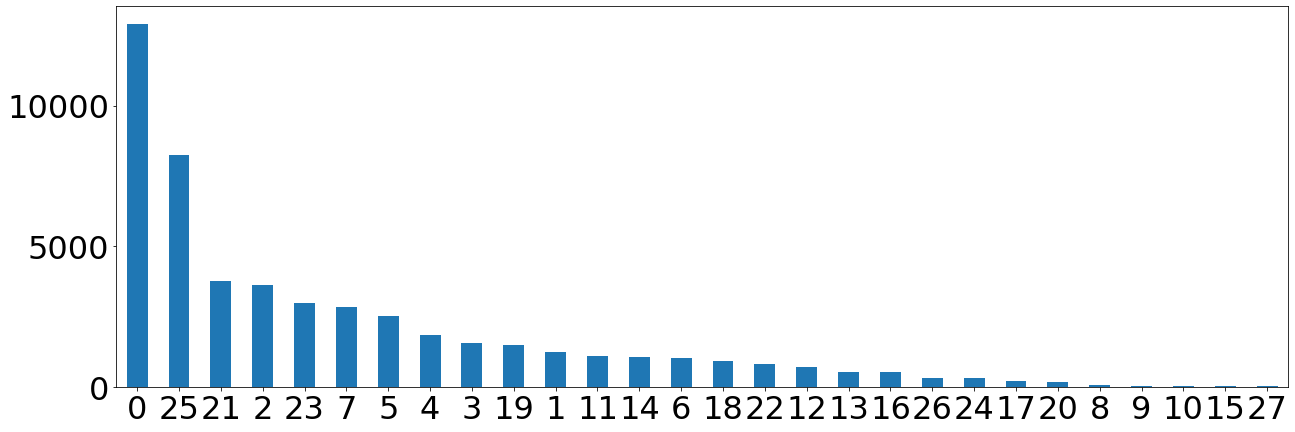

In [14]:
fig,ax = plt.subplots(figsize=(21,7.))

baseline_metrics.sort_values('count', ascending=False).plot.bar(x='key', y='count', ax=ax)
ax.set_xlabel('')
ax.tick_params(axis='both', which='major', labelsize=32, rotation=0)
ax.get_legend().remove()


# Plotting baseline F1 Scores

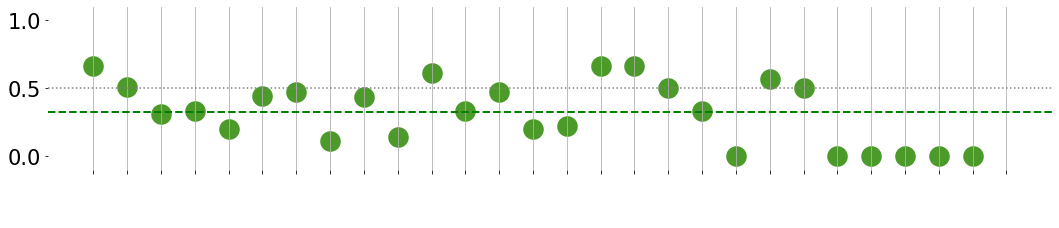

In [31]:
# Note: code is copied from plot_classes.py, in order to add mean, and overlay
 
fig,ax = plt.subplots(figsize=(18,3.))
fsize = 21

sns.scatterplot(x='occurence_order', y='f1', data=baseline_metrics, color='#4C9A2A', s=500, label='F1-score', alpha=1)

sns.scatterplot(x='occurence_order', y='f1', data=df_metrics_o, color='#4C9A2A', s=500, label='F1-score', alpha=0.0)

plt.ylim(-0.1,1.1)
plt.xticks(df_metrics_o['occurence_order'], color='white')
plt.xlabel('Location of Protein', fontsize=fsize, color='white')
#plt.ylabel(' bad         good', fontsize=18)
plt.ylabel('', fontsize=fsize)


xlab = df_metrics_o['key'].astype(str).to_list()
ax.set_xticklabels(xlab, fontsize=fsize, color='white')
ax.xaxis.grid(True)
ax.tick_params(axis='y', labelsize=fsize)
ax.get_legend().remove()

ynew = 0.5
ax.axhline(ynew, linestyle=':', color='grey', label='magic line')
ax.axhline(0.322, linestyle='--', color='green', label='mean', lw=2)
sns.despine(left=True, bottom=True);

# Plotting model F1 Scores with baseline behind

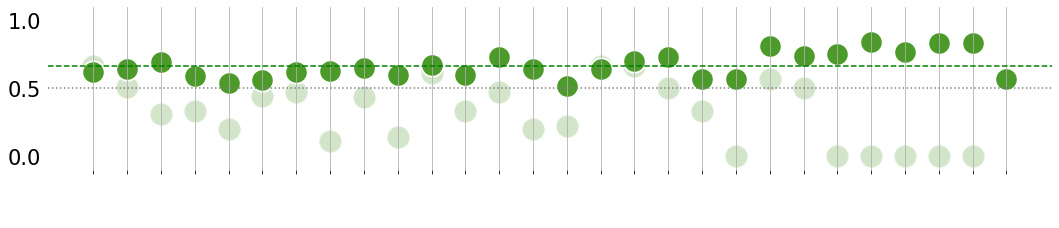

In [32]:
fig,ax = plt.subplots(figsize=(18,3.))
fsize = 21
sns.scatterplot(x='occurence_order', y='f1', data=baseline_metrics, color='#4C9A2A', s=500, label='F1-score', alpha=0.25)

sns.scatterplot(x='occurence_order', y='f1', data=df_metrics_o, color='#4C9A2A', s=500, label='F1-score')

plt.ylim(-0.1,1.1)
plt.xticks(df_metrics_o['occurence_order'])
plt.xlabel('Location of Protein', fontsize=fsize, color='white')
#plt.ylabel(' bad         good', fontsize=18)
plt.ylabel('', fontsize=fsize)


xlab = df_metrics_o['key'].astype(str).to_list()
ax.set_xticklabels(xlab, fontsize=fsize, color='white')
ax.xaxis.grid(True)
ax.tick_params(axis='y', labelsize=fsize, color='white')
ax.get_legend().remove()

ynew = 0.5
ax.axhline(ynew, linestyle=':', color='grey', label='magic line')
ax.axhline(0.666, linestyle='--', color='green', label='magic line')
sns.despine(left=True, bottom=True);

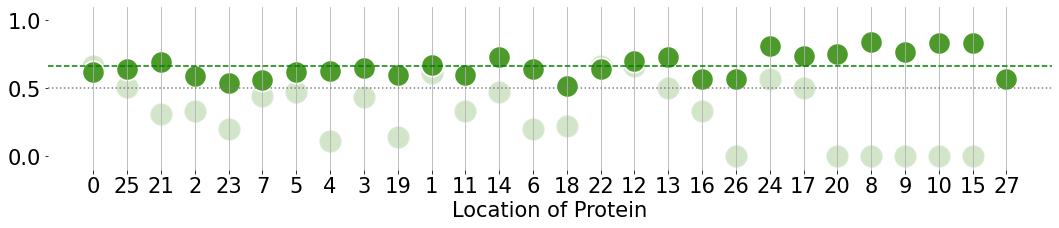

In [33]:
# FOR README

fig,ax = plt.subplots(figsize=(18,3.))
fsize = 21
sns.scatterplot(x='occurence_order', y='f1', data=baseline_metrics, color='#4C9A2A', s=500, label='F1-score', alpha=0.25)

sns.scatterplot(x='occurence_order', y='f1', data=df_metrics_o, color='#4C9A2A', s=500, label='F1-score')

plt.ylim(-0.1,1.1)
plt.xticks(df_metrics_o['occurence_order'])
plt.xlabel('Location of Protein', fontsize=fsize, color='k')
#plt.ylabel(' bad         good', fontsize=18)
plt.ylabel('', fontsize=fsize)


xlab = df_metrics_o['key'].astype(str).to_list()
ax.set_xticklabels(xlab, fontsize=fsize, color='k')
ax.xaxis.grid(True)
ax.tick_params(axis='y', labelsize=fsize, color='k')
ax.get_legend().remove()

ynew = 0.5
ax.axhline(ynew, linestyle=':', color='grey', label='magic line')
ax.axhline(0.666, linestyle='--', color='green', label='magic line')
sns.despine(left=True, bottom=True);

### Using plot_classes - didn't work for overlay and lining up plots

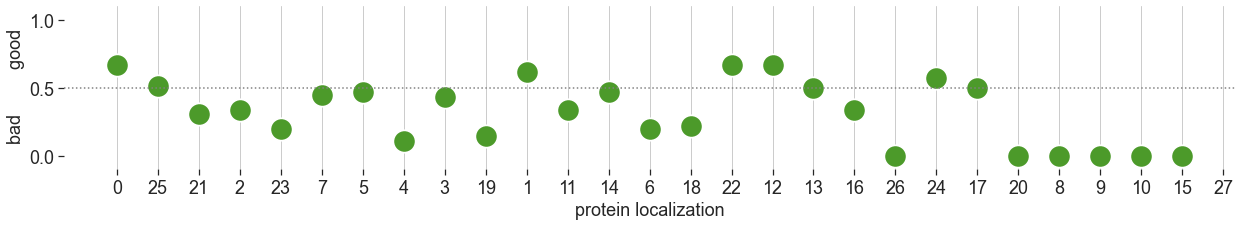

In [ ]:
sns.set_context("talk")
sns.set(style="ticks")
sns.axes_style("ticks")

base_metr_plot= MulticlassPlots(baseline_metrics)
base_metr_plot.plot_f1_score()

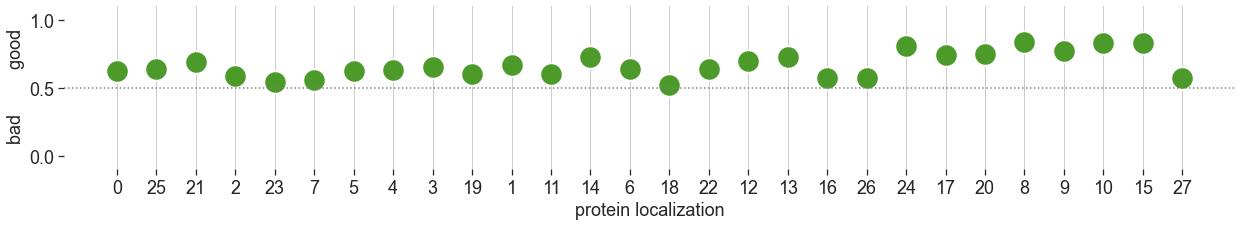

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk")
sns.set(style="ticks")
sns.axes_style("ticks")

metr_plot= MulticlassPlots(df_metrics_o)
metr_plot.plot_f1_score()